In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy.linalg import solve

### Tutorial 3: Question 1(c)
We seek to solve the heat conduction problem
\begin{align}
u_t &= u_{xx},\quad -L<x<L,\quad t>0; \\
u(x,0) &= \begin{cases} 1,& \quad x>3 \\ 0,&\quad \text{otherwise}\end{cases}
\end{align}
with zero flux boundary conditions
\begin{equation}
u_x(-L,t)=0,\quad u_x(L,t)=0.
\end{equation}
Further, we seek to explain the difference in the evolution of the solution compare to the zero boundary conditions.

Defining all the parameters, space domain, and time domain.

In [21]:
h, k = 0.5, 0.0025
alpha = 1
xstart, xstop = [-10, 10]
tstart, tstop = [0, 40]

x = np.arange(xstart, xstop + h, h)
t = np.arange(tstart, tstop + k, k)
m, n = len(x), len(t)

Defining the initial conditions.

In [22]:
initial_conditions = [1 if i>3 else 0 for i in x]

Let $\vec{u}$ be the vector such that $\vec{u}=(u_{0j},u_{1j},\ldots,u_{m-1j})$ for each $j=1,2,\ldots$.

In [23]:
u = np.zeros((m,n))
u[:,0] = initial_conditions

Using the zero flux boundary conditions,
\begin{equation}
u_x(-L,t)=0,\quad u_x(L,t)=0.
\end{equation}
The finite difference approximation for the boundary conditions are
\begin{equation}
\frac{u_{i+1,j}-u_{i-1,j}}{2h}=0
\end{equation}
for each $j=1,2,\ldots$ which can be reduced to $u_{i+1,j}=u_{i-1,j}$ for each $j=1,2,\ldots$.

Then we obtain that
\begin{equation}
u_{i,j+1}=u_{i,j}(1-2s) + 2su_{i-1,j}
\end{equation}

To obtain $\vec{u}^{\,(j)}$, we will solve $\vec{u}^{\,(j)}=A\vec{u}^{\,(j-1)}$ where 
\begin{equation}
A=
\begin{pmatrix}
1-2s & 2s & 0 & \cdots & 0 & 0 \\
s & 1-2s & s & 0 & \cdots & 0 \\
\vdots &  &  &  &  & \vdots \\
0 & \cdots & 0 & s & 1-2s & s \\
0 & 0 & \cdots & 0 & 2s & 1-2s \\
\end{pmatrix}
\end{equation}


In [24]:
s = alpha**2 * (k/h**2)
A = np.diag([1 - 2 * s] * m) + np.diag([s] * (m - 1), -1) + np.diag([s] * (m - 1), 1)
A[(0,1)] = 2*s
A[(m-1,m-2)] = 2*s

Solving $\vec{u}^{\,(j)}$ for each $j=1,2,\ldots$.

In [25]:
for j in range(1, n):
    b = u[:, j - 1].copy()
    u[:, j] = np.matmul(A, b)

Plotting `x`, `t` and `u`.

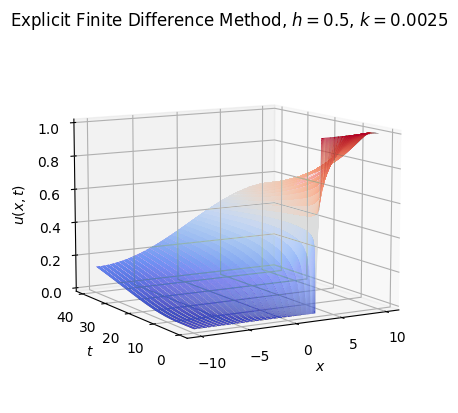

In [26]:
xv, tv = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, u.T, cmap=cm.coolwarm, rstride=1, cstride=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$t$')
ax.set_zlabel(r'$u(x,t)$', rotation=90)
ax.set_title(r'Explicit Finite Difference Method, $h={}$, $k={}$'.format(h, k))
ax.view_init(elev=10, azim=-120)
ax.zaxis.set_rotate_label(False)
plt.show()

We can also implement the implicit scheme with zero flux boundary conditions. Defining the same parameters, space domain, time domain and initial conditions as in the explicit scheme.

In [27]:
h, k = 0.5, 0.0025
alpha = 1
xstart, xstop = [-10, 10]
tstart, tstop = [0, 40]

x = np.arange(xstart, xstop + h, h)
t = np.arange(tstart, tstop + k, k)
m, n = len(x), len(t)

initial_conditions = [1 if i>3 else 0 for i in x]

Let $\vec{u}$ be the vector such that $\vec{u}=(u_{0j},u_{1j},\ldots,u_{m-1j})$ for each $j=1,2,\ldots$.

In [28]:
u = np.zeros((m,n))
u[:,0] = initial_conditions

Let $s\equiv \alpha^2 k/h^2$. We need to solve $A\vec{u}^{\,(j)}=\vec{u}^{\,(j-1)}$ for each $j=1,2,\ldots$ where
\begin{equation}
A=
\begin{pmatrix}
1+2s & -2s & 0 & \cdots & 0 & 0 \\
-s & 1+2s & -s & 0 & \cdots & 0 \\
\vdots &  &  &  &  & \vdots \\
0 & \cdots & 0 & -s & 1+2s & -s \\
0 & 0 & \cdots & 0 & -2s & 1+2s \\
\end{pmatrix}
\end{equation}

In [29]:
s = alpha**2 * (k/h**2)
A = np.diag([1 + 2 * s] * m) + np.diag([-s] * (m - 1), -1) + np.diag([-s] * (m - 1), 1)
A[(0,1)] = -2*s
A[(m-1,m-2)] = -2*s

Solving $\vec{u}^{\,(j)}$ for each $j=1,2,\ldots$.

In [30]:
for j in range(1, n):
    b = u[:,j-1].copy()
    u[:,j] = solve(A, b)

Plotting `x`, `t` and `u`.

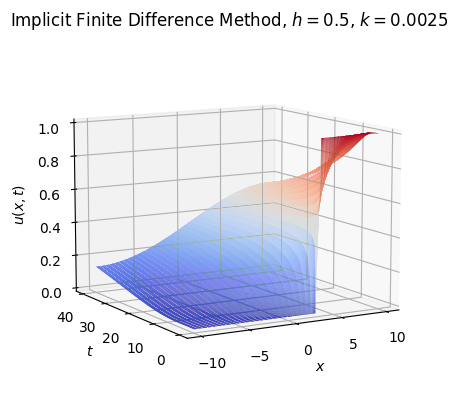

In [31]:
xv, tv = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, u.T, cmap=cm.coolwarm, rstride=1, cstride=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$t$')
ax.set_zlabel(r'$u(x,t)$', rotation=90)
ax.set_title(r'Implicit Finite Difference Method, $h={}$, $k={}$'.format(h, k))
ax.view_init(elev=10, azim=-120)
ax.zaxis.set_rotate_label(False)
plt.show()